<a href="https://colab.research.google.com/github/yigitpala/sampledatasets/blob/master/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# need newer version of statsmodels to plot cdf w/ seaborn
!pip install git+https://github.com/statsmodels/statsmodels

  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-9iqboocu
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-9iqboocu
  Created wheel for statsmodels: filename=statsmodels-0.11.0.dev0+513.gdd24392d0-cp36-cp36m-linux_x86_64.whl size=15497428 sha256=945969da881c5d6f3f3502a05e5068b2073bbc73fb41989788380dc70491cc55
  Stored in directory: /tmp/pip-ephem-wheel-cache-0pq07eeh/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.10.1
    Uninstalling statsmodels-0.10.1:
      Successfully uninstalled statsmodels-0.10.1


In [0]:
%matplotlib inline
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels

In [0]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
auto = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
auto

barrels08  barrelsA08  charge120  ...  phevCity  phevHwy  phevComb
0      15.695714         0.0        0.0  ...         0        0         0
1      29.964545         0.0        0.0  ...         0        0         0
2      12.207778         0.0        0.0  ...         0        0         0
3      29.964545         0.0        0.0  ...         0        0         0
4      17.347895         0.0        0.0  ...         0        0         0
5      14.982273         0.0        0.0  ...         0        0         0
6      13.184400         0.0        0.0  ...         0        0         0
7      13.733750         0.0        0.0  ...         0        0         0
8      12.677308         0.0        0.0  ...         0        0         0
9      13.184400         0.0        0.0  ...         0        0         0
10     12.677308         0.0        0.0  ...         0        0         0
11     15.695714         0.0        0.0  ...         0        0         0
12     13.733750         0.0        0.0  ...         0        0         0
13     15.695714         0.0        0.0  ...         0        0         0
14     25.354615         0.0        0.0  ...         0        0         0
15     14.330870         0.0        0.0  ...         0        0         0
16     16.480500         0.0        0.0  ...         0        0         0
17     15.695714         0.0        0.0  ...         0        0         0
18     17.347895         0.0        0.0  ...         0        0         0
19     17.347895         0.0        0.0  ...         0        0         0
20     20.600625         0.0        0.0  ...         0        0         0
21     20.600625         0.0        0.0  ...         0        0         0
22     25.354615         0.0        0.0  ...         0        0         0
23     14.330870         0.0        0.0  ...         0        0         0
24     17.347895         0.0        0.0  ...         0        0         0
25     25.354615         0.0        0.0  ...         0        0         0
26     15.695714         0.0        0.0  ...         0        0         0
27     16.480500         0.0        0.0  ...         0        0         0
28     16.480500         0.0        0.0  ...         0        0         0
29     16.480500         0.0        0.0  ...         0        0         0
...          ...         ...        ...  ...       ...      ...       ...
41114  12.677308         0.0        0.0  ...         0        0         0
41115  14.330870         0.0        0.0  ...         0        0         0
41116  13.184400         0.0        0.0  ...         0        0         0
41117  15.695714         0.0        0.0  ...         0        0         0
41118  16.480500         0.0        0.0  ...         0        0         0
41119  14.982273         0.0        0.0  ...         0        0         0
41120  14.330870         0.0        0.0  ...         0        0         0
41121  13.733750         0.0        0.0  ...         0        0         0
41122  21.974000         0.0        0.0  ...         0        0         0
41123  15.695714         0.0        0.0  ...         0        0         0
41124  15.695714         0.0        0.0  ...         0        0         0
41125  13.184400         0.0        0.0  ...         0        0         0
41126  11.771786         0.0        0.0  ...         0        0         0
41127  10.987000         0.0        0.0  ...         0        0         0
41128  29.964545         0.0        0.0  ...         0        0         0
41129  18.311667         0.0        0.0  ...         0        0         0
41130  15.695714         0.0        0.0  ...         0        0         0
41131  15.695714         0.0        0.0  ...         0        0         0
41132  18.311667         0.0        0.0  ...         0        0         0
41133  27.467500         0.0        0.0  ...         0        0         0
41134  16.480500         0.0        0.0  ...         0        0         0
41135  12.677308         0.0        0.0  ...         0        0         0
41136  13.7

In [0]:

auto.head().T

0  ...                             4
barrels08                             15.6957  ...                       17.3479
barrelsA08                                  0  ...                             0
charge120                                   0  ...                             0
charge240                                   0  ...                             0
city08                                     19  ...                            17
city08U                                     0  ...                             0
cityA08                                     0  ...                             0
cityA08U                                    0  ...                             0
cityCD                                      0  ...                             0
cityE                                       0  ...                             0
cityUF                                      0  ...                             0
co2                                        -1  ...                            -1
co2A                                       -1  ...                            -1
co2TailpipeAGpm                             0  ...                             0
co2TailpipeGpm                         423.19  ...                       467.737
comb08                                     21  ...                            19
comb08U                                     0  ...                             0
combA08                                     0  ...                             0
combA08U                                    0  ...                             0
combE                                       0  ...                             0
combinedCD                                  0  ...                             0
combinedUF                                  0  ...                             0
cylinders                                   4  ...                             4
displ                                       2  ...                           2.2
drive                        Rear-Wheel Drive  ...    4-Wheel or All-Wheel Drive
engId                                    9011  ...                         66031
eng_dscr                                (FFS)  ...                    (FFS,TRBO)
feScore                                    -1  ...                            -1
fuelCost08                               2000  ...                          2700
fuelCostA08                                 0  ...                             0
...                                       ...  ...                           ...
rangeCity                                   0  ...                             0
rangeCityA                                  0  ...                             0
rangeHwy                                    0  ...                             0
rangeHwyA                                   0  ...                             0
trany                            Manual 5-spd  ...                  Manual 5-spd
UCity                                 23.3333  ...                            21
UCityA                                      0  ...                             0
UHighway                                   35  ...                            32
UHighwayA                                   0  ...                             0
VClass                            Two Seaters  ...                  Compact Cars
year                                     1985  ...                          1993
youSaveSpend                            -2250  ...                         -5750
guzzler                                   NaN  ...                           NaN
trans_dscr                                NaN  ...                           NaN
tCharger                                  NaN  ...                             T
sCharger                                  NaN  ...                           NaN
atvType                                   NaN  ...                           NaN
fuelType2                                 NaN  ...                         

In [0]:
auto.dtypes

barrels08          float64
barrelsA08         float64
charge120          float64
charge240          float64
city08               int64
city08U            float64
cityA08              int64
cityA08U           float64
cityCD             float64
cityE              float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
comb08U            float64
combA08              int64
combA08U           float64
combE              float64
combinedCD         float64
combinedUF         float64
cylinders          float64
displ              float64
drive               object
engId                int64
eng_dscr            object
feScore              int64
fuelCost08           int64
fuelCostA08          int64
                    ...   
rangeCity          float64
rangeCityA         float64
rangeHwy           float64
rangeHwyA          float64
trany               object
UCity              float64
U

In [0]:
# missing data
((auto
  .isna()
  .mean()
  * 100)
  .pipe(lambda ser : ser[ser > 0])
)

cylinders      0.500681
displ          0.495820
drive          2.889850
eng_dscr      39.259673
trany          0.026735
guzzler       94.110927
trans_dscr    63.428446
tCharger      83.297686
sCharger      97.958390
atvType       91.347463
fuelType2     96.096636
rangeA        96.108789
evMotor       97.929224
mfrCode       74.902780
c240Dscr      99.803130
c240bDscr     99.807991
startStop     77.056193
dtype: float64

In [0]:
auto.loc[auto.cylinders.isna(), ['make', 'model', 'year']]

make                               model  year
7138       Nissan                            Altra EV  2000
7139       Toyota                             RAV4 EV  2000
8143       Toyota                             RAV4 EV  2001
8144         Ford                               Th!nk  2001
8146         Ford              Explorer USPS Electric  2001
8147       Nissan                          Hyper-Mini  2001
9212       Toyota                             RAV4 EV  2002
9213         Ford              Explorer USPS Electric  2002
10329      Toyota                             RAV4 EV  2003
21413      Subaru                            RX Turbo  1985
21414      Subaru                            RX Turbo  1985
21506       Mazda                                RX-7  1986
23026        Ford                   Ranger Pickup 2WD  2001
23027        Ford                   Ranger Pickup 2WD  2000
23028        Ford                   Ranger Pickup 2WD  2000
23029         GMC                                 EV1  1999
23030         GMC                                 EV1  1999
23032       Honda                             EV Plus  1999
23033        Ford                   Ranger Pickup 2WD  1999
23034        Ford                   Ranger Pickup 2WD  1999
23035       Dodge           Caravan/Grand Caravan 2WD  1999
23036    Plymouth           Voyager/Grand Voyager 2WD  1999
23037       Honda                             EV Plus  1998
23038   Chevrolet                        S10 Electric  1998
23039   Chevrolet                        S10 Electric  1998
23040        MINI                               MiniE  2008
23041      Nissan                                Leaf  2011
23137       smart     fortwo electric drive cabriolet  2011
23138       smart         fortwo electric drive coupe  2011
23806  Mitsubishi                              i-MiEV  2012
...           ...                                 ...   ...
34089      Jaguar                              I-Pace  2019
34166         BMW                                  i3  2019
34167         BMW                                 i3s  2019
34168       Tesla                   Model 3 Mid Range  2018
34173         Kia                       Niro Electric  2019
34265        Fiat                                500e  2019
34308       Honda                          Clarity EV  2019
34309       smart                   EQ fortwo (coupe)  2019
34310       smart             EQ fortwo (convertible)  2019
34311       Tesla                   Model 3 Mid Range  2019
34312       Tesla                  Model 3 Long Range  2019
34314       Tesla              Model 3 Long Range AWD  2019
34315       Tesla  Model 3 Long Range AWD Performance  2019
34316       Tesla                         Model S 75D  2019
34317       Tesla                        Model S 100D  2019
34318       Tesla                       Model S P100D  2019
34319       Tesla                         Model X 75D  2019
34320       Tesla                        Model X 100D  2019
34321       Tesla                       Model X P100D  2019
34364         Kia                       Soul Electric  2020
34407         BYD                                  e6  2019
34408      Nissan        Leaf (62 kW-hr battery pack)  2019
34409      Nissan  Leaf SV/SL (62 kW-hr battery pack)  2019
34538        Audi                              e-tron  2019
34561      Jaguar                              I-Pace  2020
34563       Tesla              Model 3 Standard Range  2019
34564       Tesla         Model 3 Standard Range Plus  2019
34565       Tesla                  Model S Long Range  2019
34566       Tesla    Model S Performance (19" Wheels)  2019
34567       Tesla    Model S Performance (21" Wheels)  2019

[206 rows x 3 columns]

In [0]:
# Just look at categorical columns
auto.select_dtypes(include=[object]).dtypes

drive         object
eng_dscr      object
fuelType      object
fuelType1     object
make          object
model         object
mpgData       object
trany         object
VClass        object
guzzler       object
trans_dscr    object
tCharger      object
sCharger      object
atvType       object
fuelType2     object
rangeA        object
evMotor       object
mfrCode       object
c240Dscr      object
c240bDscr     object
createdOn     object
modifiedOn    object
startStop     object
dtype: object

In [0]:
auto.drive.value_counts()

In [0]:
auto.drive.value_counts(dropna=False)

In [0]:
auto.fuelType2.value_counts()

E85            1444
Electricity     134
Natural Gas      20
Propane           8
Name: fuelType2, dtype: int64

In [0]:
auto.VClass.value_counts()

Compact Cars                          5886
Subcompact Cars                       5155
Midsize Cars                          4858
Standard Pickup Trucks                2354
Large Cars                            2179
Sport Utility Vehicle - 4WD           2090
Two Seaters                           2076
Sport Utility Vehicle - 2WD           1627
Small Station Wagons                  1605
Special Purpose Vehicles              1455
Minicompact Cars                      1383
Standard Pickup Trucks 2WD            1263
Vans                                  1141
Standard Pickup Trucks 4WD            1087
Small Sport Utility Vehicle 4WD        847
Special Purpose Vehicle 2WD            664
Standard Sport Utility Vehicle 4WD     663
Midsize-Large Station Wagons           656
Small Sport Utility Vehicle 2WD        595
Midsize Station Wagons                 544
Small Pickup Trucks                    538
Small Pickup Trucks 2WD                468
Vans, Cargo Type                       438
Minivan - 2

In [0]:
auto.atvType.value_counts(dropna=False)

NaN               37584
FFV                1444
Diesel             1108
Hybrid              593
EV                  203
Plug-in Hybrid      134
CNG                  50
Bifuel (CNG)         20
Bifuel (LPG)          8
Name: atvType, dtype: int64

In [0]:
auto.make.value_counts()

Chevrolet                             4003
Ford                                  3371
Dodge                                 2583
GMC                                   2494
Toyota                                2071
BMW                                   1966
Mercedes-Benz                         1538
Nissan                                1471
Volkswagen                            1180
Mitsubishi                            1067
Porsche                               1053
Mazda                                 1005
Audi                                  1002
Honda                                 1001
Jeep                                   929
Pontiac                                893
Subaru                                 885
Volvo                                  810
Hyundai                                783
Chrysler                               726
Buick                                  667
Kia                                    612
Mercury                                609
Cadillac   

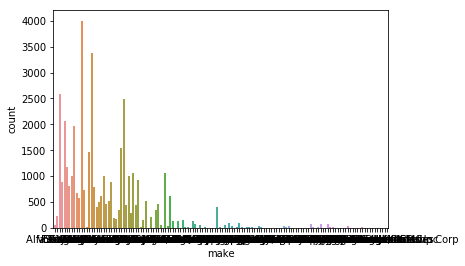

In [0]:
# visualize categorical counts
sns.countplot(auto.make)

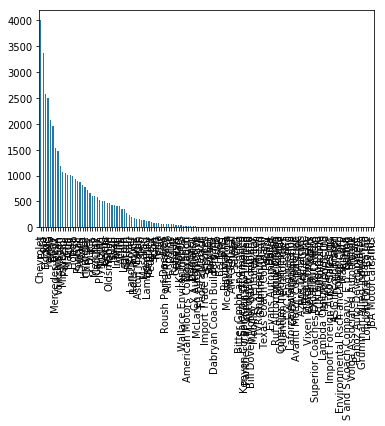

In [0]:
# we can just use pandas too
auto.make.value_counts().plot.bar()

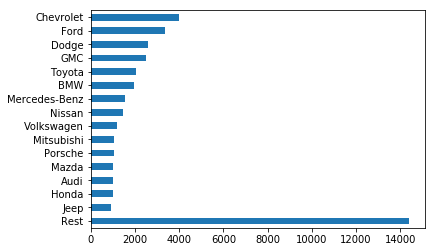

In [0]:
# limit amounts
make_counts = auto.make.value_counts()
limit = 15
ax = (
    pd.concat([make_counts.iloc[:limit], 
               pd.Series(make_counts.iloc[limit:].sum(), index=['Rest'])])
    .iloc[::-1]
    .plot.barh()
)

In [0]:
# Clean up  graph a little
# Feature of Colab
#@title Default title text
limit = 5 #@param {type:"integer"}

make_counts = auto.make.value_counts()
counts = (pd.concat([make_counts.iloc[:limit], 
  pd.Series(make_counts.iloc[limit:].sum(), index=['Rest'])])
  .iloc[::-1])
ax = (counts
    .plot.barh()
)
ax.tick_params(bottom=False, labelbottom=False,
              left=False)
for i, (pos, value) in enumerate(counts.iteritems()):
    ax.text(value, i, str(value),
            color='white',
            fontdict={'fontsize':9},
            va='center', ha='right'
           )
_ = ax.set_title('Count of Makes')

In [0]:
# get summary stats
auto.describe()

barrels08    barrelsA08  ...       phevHwy      phevComb
count  41144.000000  41144.000000  ...  41144.000000  41144.000000
mean      17.283900      0.220294  ...      0.152999      0.152513
std        4.623232      1.140919  ...      2.825546      2.873408
min        0.060000      0.000000  ...      0.000000      0.000000
25%       14.330870      0.000000  ...      0.000000      0.000000
50%       16.480500      0.000000  ...      0.000000      0.000000
75%       19.388824      0.000000  ...      0.000000      0.000000
max       47.087143     18.311667  ...     81.000000     88.000000

[8 rows x 59 columns]

In [0]:
# takes a bit of time to run ~1 min
pandas_profiling.ProfileReport(auto)

In [0]:
# inspect a single column
auto.city08.describe()

count    41144.000000
mean        18.369045
std          7.905886
min          6.000000
25%         15.000000
50%         17.000000
75%         20.000000
max        150.000000
Name: city08, dtype: float64

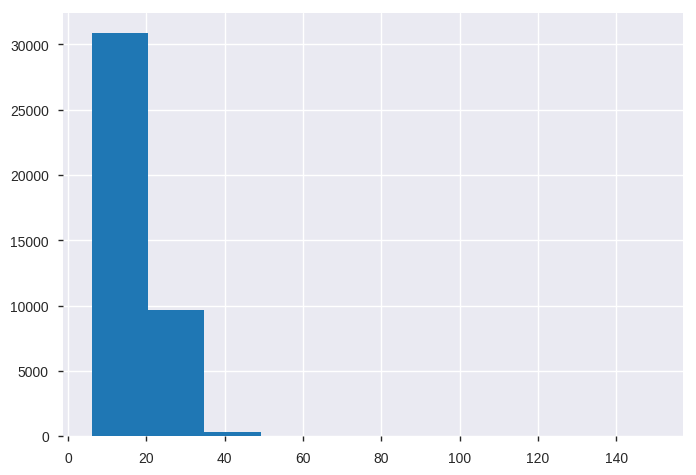

In [0]:
auto.city08.hist()

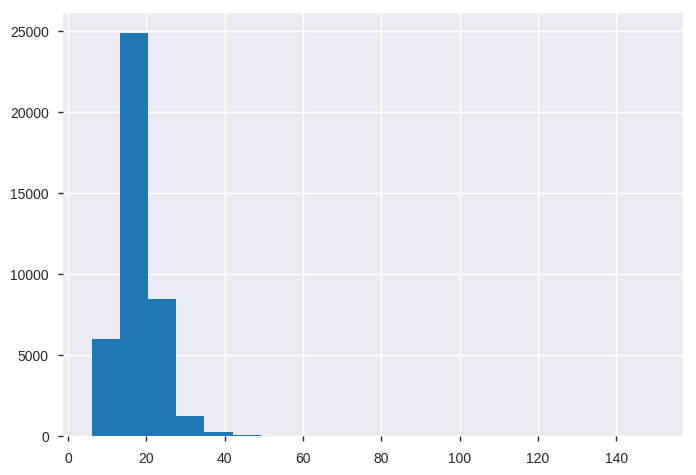

In [0]:
# change number of bins
auto.city08.hist(bins=20)

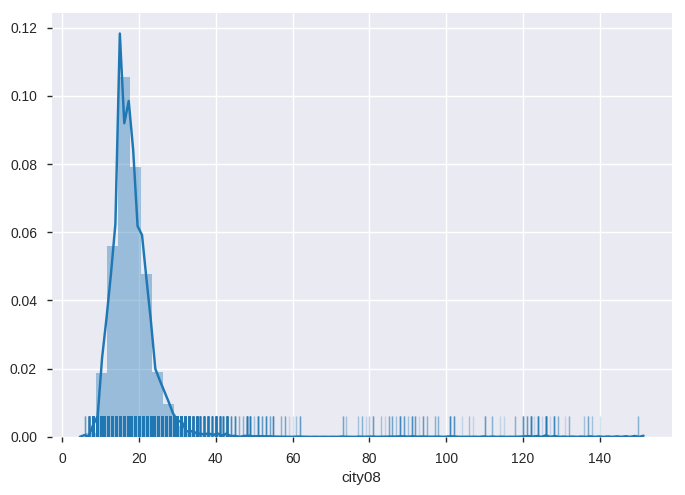

In [0]:
sns.distplot(auto.city08, rug=True, rug_kws={'alpha':.2})

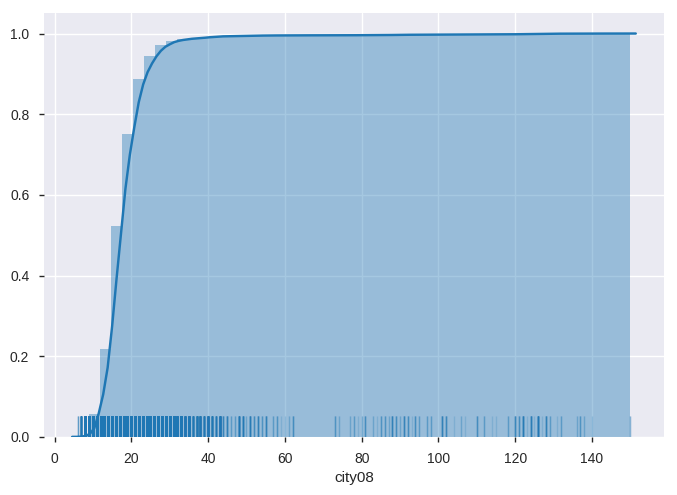

In [0]:
# need updated version of statsmodels for kde
sns.distplot(auto.city08, rug=True, rug_kws={'alpha':.2},
             hist_kws={'cumulative': True},
             kde_kws={'cumulative': True})

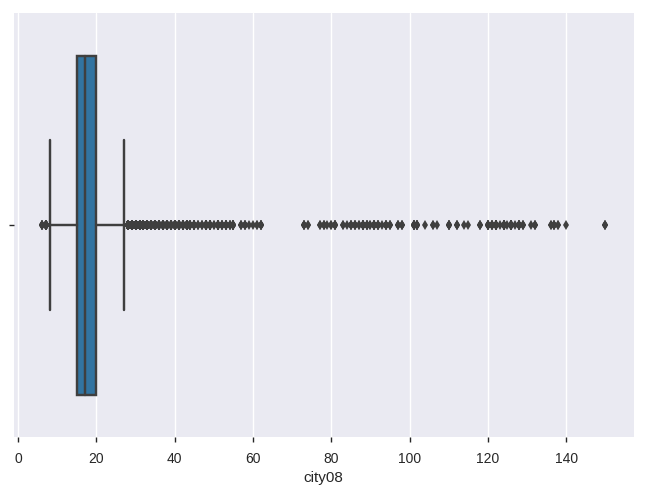

In [0]:
sns.boxplot(auto.city08)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


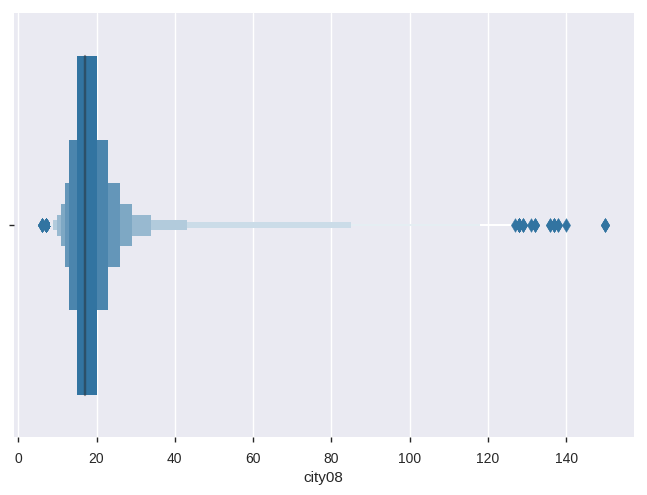

In [0]:
sns.boxenplot(auto.city08)

In [0]:
# one way to get values for above
bins=list(auto.city08.quantile([0,0.5,0.75, 0.875, 0.9375, 0.96875, 0.984375, 0.9921875, 0.99609375,  0.998046875]))
pd.cut(auto.city08, 
       labels=bins[:-1],
       bins=bins).value_counts()

6.0     21496
17.0     9371
20.0     5669
23.0     2262
26.0     1149
29.0      587
34.0      314
43.0      133
85.0       79
Name: city08, dtype: int64

In [0]:
auto.city08.quantile([.1, .2, .3])

0.1    13.0
0.2    14.0
0.3    15.0
Name: city08, dtype: float64

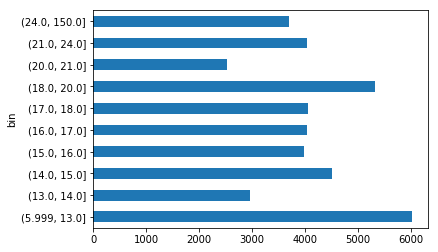

In [0]:

# quantile cut - put in 10 buckets (deciles)
(auto
  .assign(bin=pd.qcut(auto.city08, 10))
  .groupby('bin')
  .size()
  .plot.barh()
)

In [0]:
auto.city08.value_counts()

15     4503
18     4053
17     4035
16     3975
19     3012
14     2969
21     2532
20     2306
13     2102
22     1714
12     1568
11     1470
23     1423
24      899
25      729
26      634
10      544
27      507
28      392
29      250
31      210
9       200
30      175
8        96
33       85
32       70
35       63
34       47
40       46
43       43
       ... 
78        3
97        3
57        3
112       3
46        3
61        2
83        2
50        2
77        2
87        2
138       2
136       2
80        2
90        2
74        2
106       2
125       1
131       1
93        1
115       1
59        1
114       1
60        1
123       1
104       1
84        1
107       1
140       1
79        1
127       1
Name: city08, Length: 105, dtype: int64

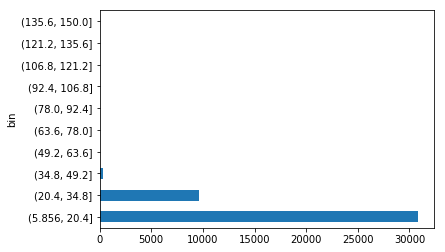

In [0]:
# cut - 10 equal width bins (histogram does this)
(auto
  .assign(bin=pd.cut(auto.city08, 10))
  .groupby('bin')
  .size()
  .plot.barh()
)

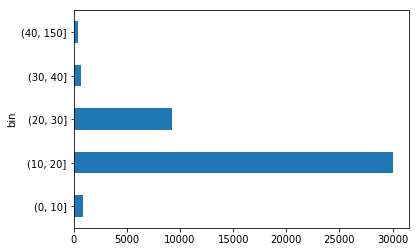

In [0]:
# specify your own cut points
(auto
  .assign(bin=pd.cut(auto.city08, [0, 10, 20, 30, 40, 150]))
  .groupby('bin')
  .size()
  .plot.barh()
)

In [0]:
# relationships
# continuous vs continuous
auto.city08.corr(auto.highway08)

0.9393654130640564

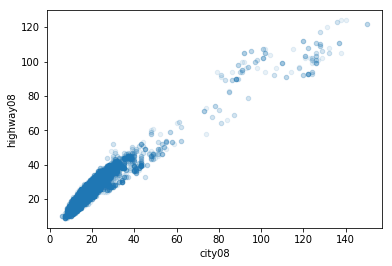

In [0]:
auto.plot.scatter(x='city08', y='highway08', alpha=.1)

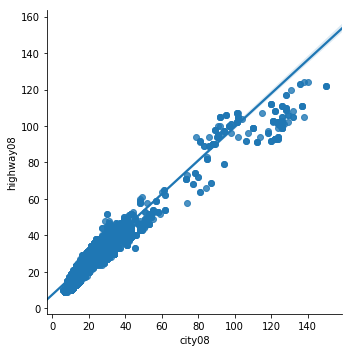

In [0]:
sns.lmplot('city08', 'highway08', data=auto)

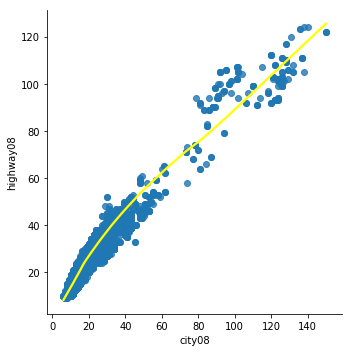

In [0]:
sns.lmplot('city08', 'highway08', data=auto, lowess=True, line_kws={'color':'yellow'})

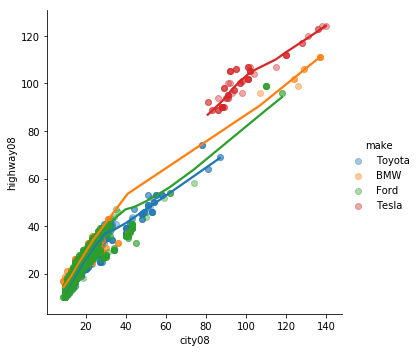

In [0]:
# add some more dimensions
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
sns.lmplot('city08', 'highway08', data=auto[mask], lowess=True,
           scatter_kws={'alpha':.4}, hue='make')

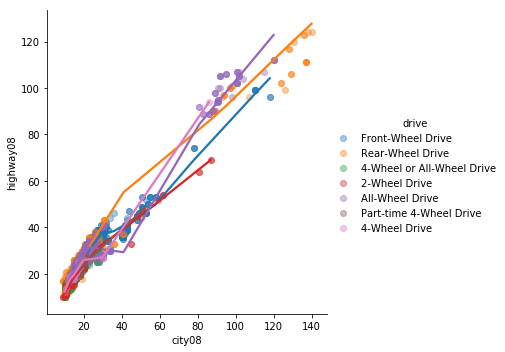

In [0]:
# add some more dimensions
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
sns.lmplot('city08', 'highway08', data=auto[mask], lowess=True,
           scatter_kws={'alpha':.4}, hue='drive')

In [0]:
# add some more dimensions
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
sns.lmplot('city08', 'highway08', data=auto[mask], lowess=True,
           scatter_kws={'alpha':.4}, col='drive', col_wrap=3, hue='make')

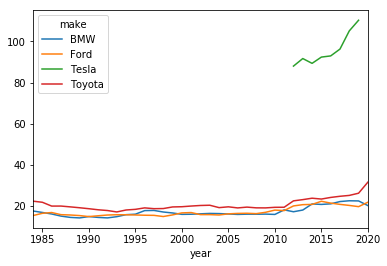

In [0]:
# time - avg mpg over years
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .groupby(['year', 'make'])
  ['city08']
  .mean()
  .unstack()
  .plot()
)
ax

(0, 35)

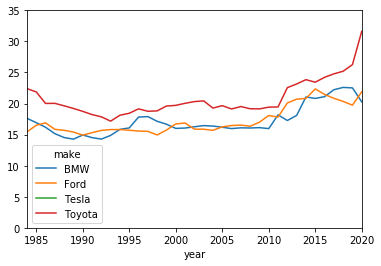

In [0]:
# time - avg mpg over years
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .groupby(['year', 'make'])
  ['city08']
  .mean()
  .unstack()
  .plot()
)
ax.set_ylim(0, 35)

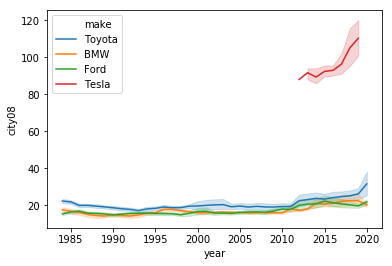

In [0]:
sns.lineplot(x='year', y='city08', data=auto[mask], hue='make')

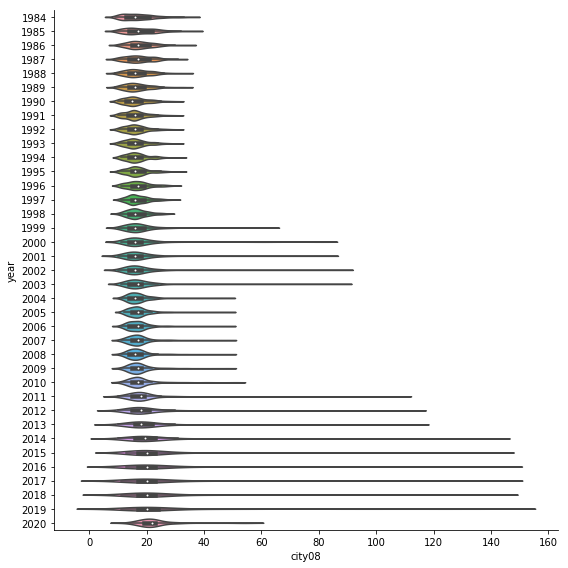

In [0]:
sns.catplot(y='year', x='city08', orient='h', data=auto[mask], kind='violin',
               height=8, aspect=1)

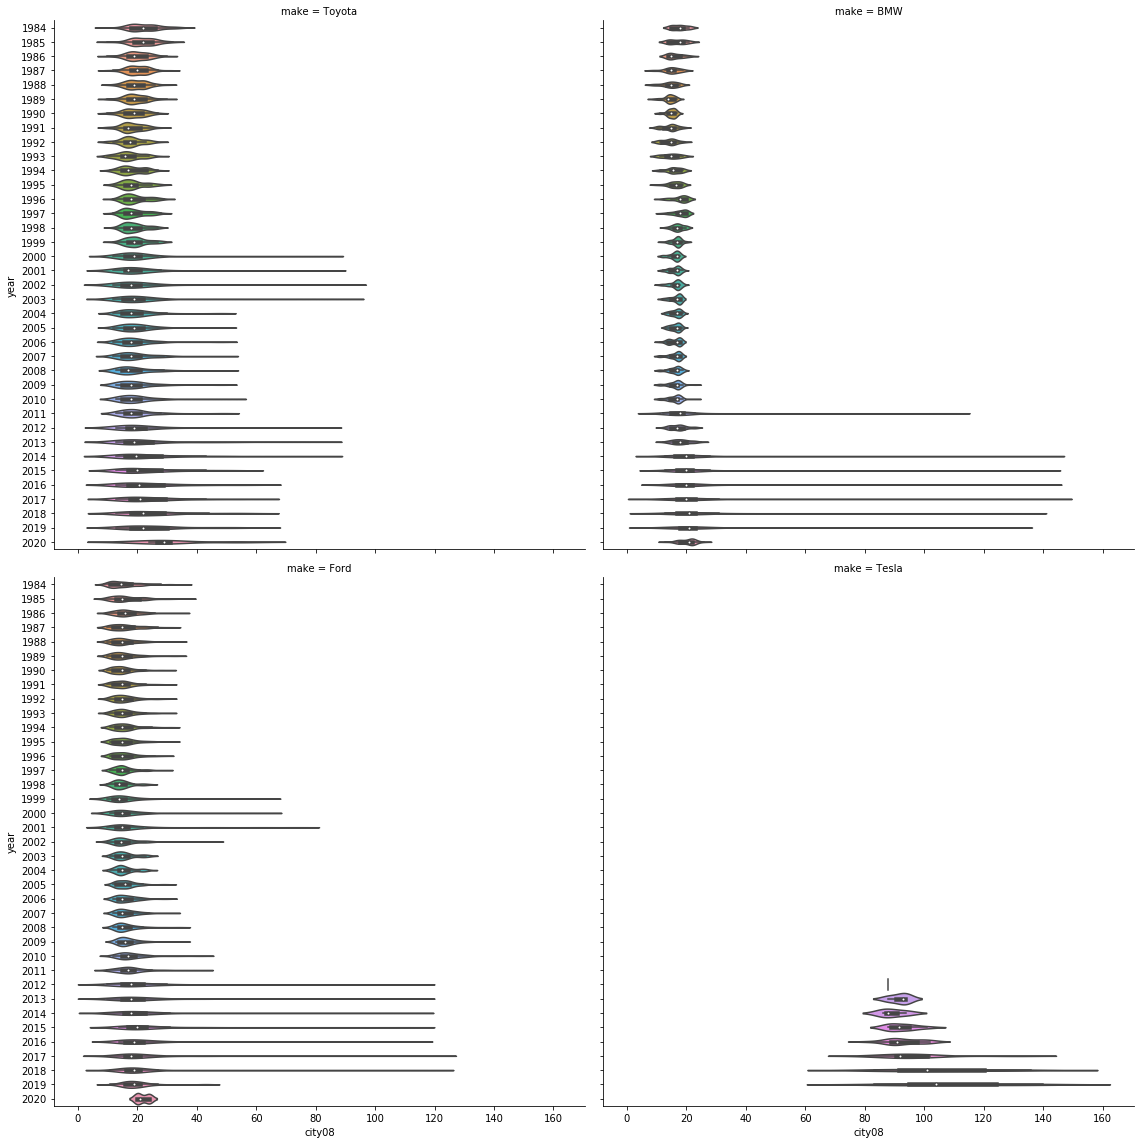

In [0]:
sns.catplot(y='year', x='city08', orient='h', data=auto[mask], kind='violin',
            col='make', col_wrap=2,
               height=8, aspect=1)

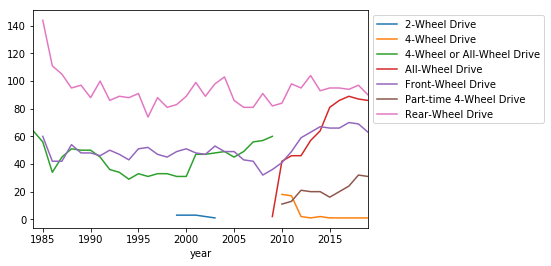

In [0]:
# time - category counts over time
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .groupby(['year'])
  ['drive']
  .value_counts()
  .unstack()
  .iloc[:-1]
  .plot()
  .legend(bbox_to_anchor=(1,1))
)

(1984, 2019)

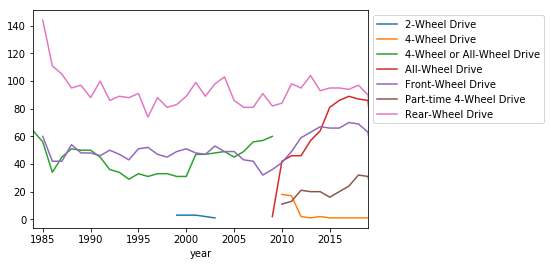

In [0]:
# remove 2020 as it is missing data
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .groupby(['year'])
  ['drive']
  .value_counts()
  .unstack()
  .plot()
  
)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlim(1984, 2019)

(1984, 2019)

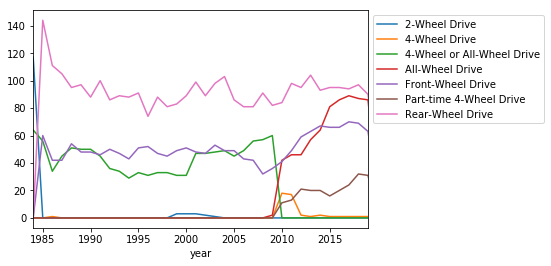

In [0]:
# Crosstab version
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .pipe(lambda df: pd.crosstab(df.year, df.drive))
  .plot()
  
)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlim(1984, 2019)

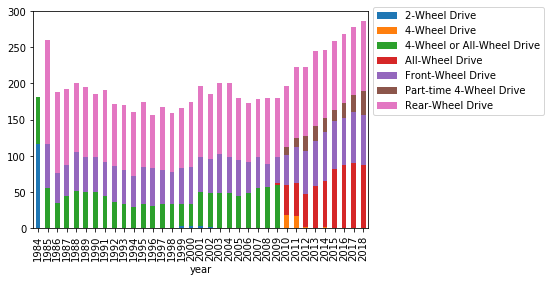

In [0]:
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .pipe(lambda df: pd.crosstab(df.year, df.drive))
  .plot.bar(stacked=True)
)
# bar plot uses 1 for each item, rather than value
ax.set_xlim(-.5, 2018-1984 + .5)
ax.legend(bbox_to_anchor=(1,.5))

(-0.5, 34.5)

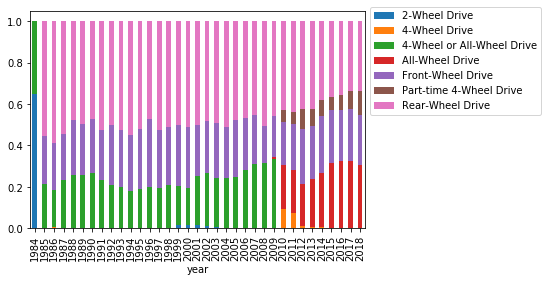

In [0]:
# normalize
# remove 2020 as it is missing data
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .pipe(lambda df: pd.crosstab(df.year, df.drive))
  .pipe(lambda df: df.div(df.sum(1), axis=0))
  .plot.bar(stacked=True)
  
)
ax.legend(bbox_to_anchor=(1,.5))
# bar plot uses 1 for each item, rather than value
ax.set_xlim(-.5, 2018-1984 + .5)

In [0]:

auto.drive.value_counts().index

Index(['Front-Wheel Drive', 'Rear-Wheel Drive', '4-Wheel or All-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', '2-Wheel Drive',
       'Part-time 4-Wheel Drive'],
      dtype='object')

(0, 1)

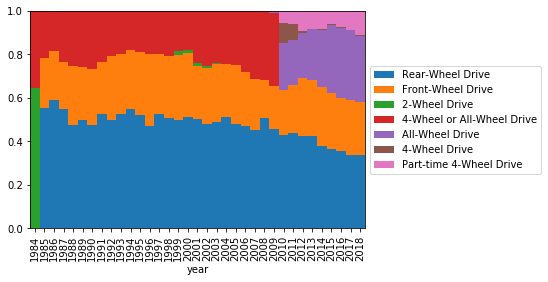

In [0]:
# Adjust order using drives variable
drives = ['Rear-Wheel Drive', 'Front-Wheel Drive',
          '2-Wheel Drive',
          '4-Wheel or All-Wheel Drive',
          'All-Wheel Drive',
          '4-Wheel Drive', 
          'Part-time 4-Wheel Drive', ]
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax = (auto
  [mask]
  .pipe(lambda df: pd.crosstab(df.year, df.drive))
  .pipe(lambda df: df.div(df.sum(1), axis=0))
  [drives]    
  .plot.bar(stacked=True, width=1)
)
ax.legend(bbox_to_anchor=(1,.5))
# bar plot uses 1 for each item, rather than value
ax.set_xlim(-.5, 2018-1984 + .5)
ax.set_ylim(0, 1)

Text(0.5, 1.0, 'Avg City08')

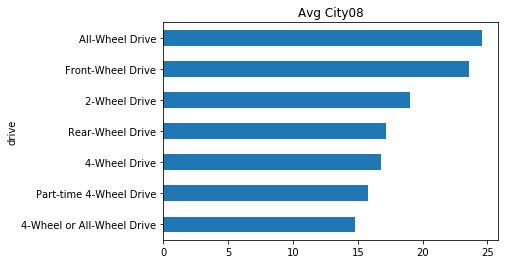

In [0]:
# categorical vs numeric (although year is somewhat categorical)
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax =(auto
  [mask]
  .groupby(['drive'])
  ['city08']
  .mean()
  .sort_values()
  .plot.barh()
)
ax.set_title('Avg City08')

Text(0.5, 1.0, 'Avg City08')

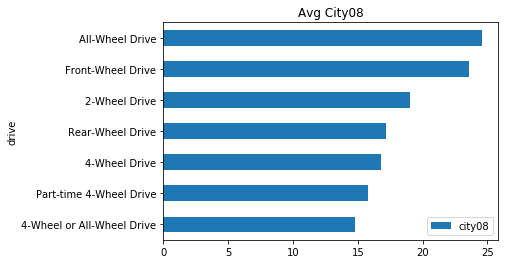

In [0]:
# categorical vs numeric (although year is somewhat categorical)
mask = auto.make.isin(['Ford', 'Tesla', 'Toyota', 'BMW'])
ax =(auto
  [mask]
  .pipe(lambda df: pd.pivot_table(df, index='drive', values='city08', aggfunc='mean'))
  .sort_values(by='city08')
  .plot.barh()
)
ax.set_title('Avg City08')

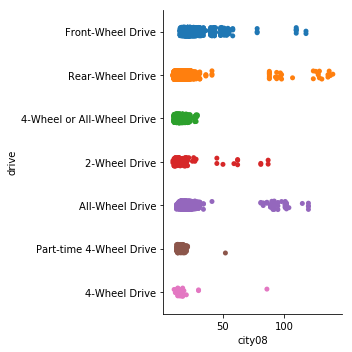

In [0]:
sns.catplot(x='city08', y='drive', data=auto[mask])

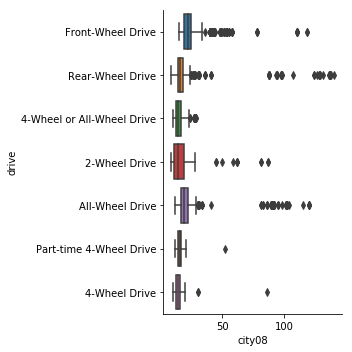

In [0]:
sns.catplot(x='city08', y='drive', data=auto[mask], kind='box')

In [0]:
sns.catplot?

In [0]:
# PCA
cols = ['charge120', 'city08', 'comb08', 'cylinders', 'drive', 'highway08', 'make',  'year', 'range', 'trany']
# standardize data
model = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('pca', decomposition.PCA(random_state=42))])
X = pd.get_dummies(auto[cols], drop_first=True).fillna(0)
X_pca = model.fit_transform(X)
pca = model.named_steps['pca']

In [0]:
X_pca.shape

(41144, 184)

In [0]:
model.steps

[('std', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
      svd_solver='auto', tol=0.0, whiten=False))]

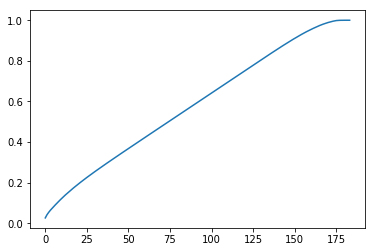

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [0]:
np.cumsum(pca.explained_variance_ratio_)

In [0]:
# Find columns that most influence components
comps = pd.DataFrame(pca.components_, columns=X.columns)
pca_cols = set()
num_comps = 2
for i in range(num_comps):
    parts = comps.iloc[i][comps.iloc[i].abs() > .2]
    pca_cols.update(set(parts.index))
pca_cols

{'city08',
 'comb08',
 'cylinders',
 'drive_All-Wheel Drive',
 'drive_Front-Wheel Drive',
 'highway08',
 'make_Tesla',
 'range',
 'trany_Automatic (S8)',
 'trany_Manual 5-spd',
 'year'}

In [0]:
# How original columns impact each component
pd.DataFrame(pca.components_, columns=X.columns).loc[:,list(pca_cols)].T

0         1    ...       182           183
city08                   0.423665  0.016652  ... -0.003563 -7.494937e-18
highway08                0.434495  0.043701  ...  0.000404 -2.351245e-18
drive_Front-Wheel Drive  0.228683 -0.250894  ...  0.000971 -8.924777e-19
comb08                   0.434887  0.024773  ...  0.003532  9.246387e-18
trany_Manual 5-spd       0.054758 -0.224001  ... -0.001182 -3.068573e-18
drive_All-Wheel Drive    0.060609  0.287639  ...  0.000633 -8.522272e-19
make_Tesla               0.222457  0.080416  ... -0.043492 -3.743967e-19
year                     0.112269  0.462218  ... -0.000108  2.070048e-18
cylinders               -0.321867  0.207305  ...  0.000319  9.868625e-19
trany_Automatic (S8)     0.016377  0.240297  ... -0.000624 -1.965768e-18
range                    0.282351  0.083547  ... -0.000023  3.574415e-19

[11 rows x 184 columns]

In [0]:
auto.style.background_gradient

<bound method Styler.background_gradient of <pandas.io.formats.style.Styler object at 0x7ff892acd7f0>>

In [0]:
# add coloring
(pd.DataFrame(pca.components_, columns=X.columns)
 .loc[:,list(pca_cols)]
 .T
 .style.background_gradient(cmap='RdBu', axis=0)
)

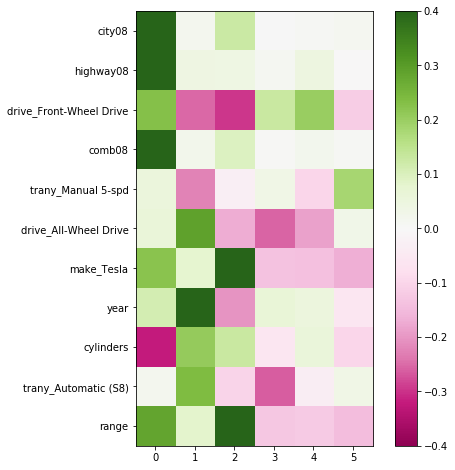

In [0]:
#Alternate view
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(pd.DataFrame(pca.components_, columns=X.columns).loc[:5, list(pca_cols)].T, 
           cmap='PiYG', vmin=-.4, vmax=.4)
plt.yticks(range(len(pca_cols)), list(pca_cols))
plt.colorbar()

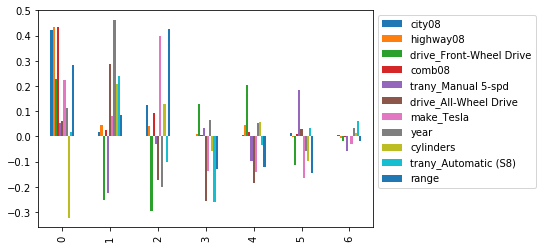

In [0]:
# visualize amount
comps = pd.DataFrame(pca.components_, columns=X.columns)
comps[list(pca_cols)].iloc[:7].plot.bar().legend(bbox_to_anchor=(1,1))

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:202: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


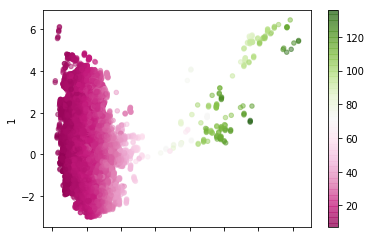

In [0]:
# plot pc1 vs pc2
# color by comb08 (which is a big impact for pc1)
ax = pd.DataFrame(X_pca).plot.scatter(x=0, y=1, alpha=.5, cmap='PiYG',
                                      color=auto.comb08, 
                                     )

In [0]:
from bokeh.io import output_notebook
from bokeh import models, palettes, transform
from bokeh.plotting import figure, show

def bokeh_scatter(
    x,
    y,
    data,
    hue=None,
    label_cols=None,
    size=None,
    legend=None,
    alpha=0.5,
):
    """
    x - x column name to plot
    y - y column name to plot
    data - pandas DataFrame
    hue - column name to color by (numeric)
    legend - column name to label by
    label_cols - columns to use in tooltip
                 (None all in DataFrame)
    size - size of points in screen space unigs
    alpha - transparency
    """
    output_notebook()
    circle_kwargs = {}
    if legend:
        circle_kwargs["legend"] = legend
    if size:
        circle_kwargs["size"] = size
    if hue:
        color_seq = data[hue]
        mapper = models.LinearColorMapper(
            palette=palettes.viridis(256),
            low=min(color_seq),
            high=max(color_seq),
        )
        circle_kwargs[
            "fill_color"
        ] = transform.transform(hue, mapper)
    ds = models.ColumnDataSource(data)
    if label_cols is None:
        label_cols = data.columns
    tool_tips = sorted(
        [
            (x, "@{}".format(x))
            for x in label_cols
        ],
        key=lambda tup: tup[0],
    )
    hover = models.HoverTool(
        tooltips=tool_tips
    )
    fig = figure(
        tools=[
            hover,
            "pan",
            "zoom_in",
            "zoom_out",
            "reset",
        ],
        toolbar_location="below",
    )

    fig.circle(
        x,
        y,
        source=ds,
        alpha=alpha,
        **circle_kwargs
    )
    show(fig)
    return fig



In [0]:
res = bokeh_scatter(
    "PC1",
    "PC2",
    data=pd.concat([
        pd.DataFrame(X_pca, 
                     columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]), 
        auto], axis=1).sample(1000),
    hue="comb08",
    label_cols=['make', 'model', 'year', 'comb08'],
    size=5,
)

In [0]:
# Clustering

cols = ['charge120', 'city08', 'comb08', 'cylinders', 'drive', 'highway08', 'make',  'year', 'range', 'trany']
# standardize data
cmodel = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('cluster', cluster.KMeans(n_clusters=5, random_state=42))])
X = pd.get_dummies(auto[cols], drop_first=True).fillna(0)
cmodel.fit(X)
                         
labels = cmodel.predict(X)

In [0]:
res = bokeh_scatter(
    "PC1",
    "PC2",
    data=(pd.concat([
        pd.DataFrame(X_pca, 
                     columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]), 
        auto], axis=1)
          .assign(label=labels)
          .sample(1000)),
    hue="label",
    label_cols=['make', 'model', 'year', 'comb08', 'label'],
    size=5,
)

In [0]:
# explain clusters
(auto
 .assign(label=labels)
 .groupby('label')
 .mean()
 .T
 .style.background_gradient(cmap='RdBu', axis=1)
)